In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
dataset.loc[dataset['labels'] != 0, 'labels'] = 1
dataset.loc[dataset['labels'] == 0, 'labels'] = 0
print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
print(data)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dataset['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

## SVM

In [3]:
from sklearn import datasets
import pandas as pd
datasetsvm = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasetsvm['Unnamed: 0']
del datasetsvm['event_date']
print(dataset)


datasvm = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasvm['Unnamed: 0']
del datasvm['event_date']
del datasvm['labels']
print(datasvm)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [4]:
from sklearn.model_selection import train_test_split
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(datasvm, datasetsvm['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [5]:
svm_train= X_trainsvm
svm_train['labels'] = y_trainsvm
svm_new = svm_train[svm_train['labels']!= 0]
svm_new

y_train_svm_new = svm_new['labels']
X_train_svm_new = svm_new

del X_train_svm_new['labels']
X_train_svm_new

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
5526,1386061,730136162,5,0,0
32324,4530654,706178616,6,6,6
60215,3291060,525828203,7,0,0
35467,124924,659944403,0,2,2
22179,1647148,332206856,0,4,4
...,...,...,...,...,...
7854,1537668,377008742,2,2,2
8188,10288759,168445983,8,0,0
28344,2474839,748441225,5,0,0
59225,1179191,73756576,1,1,1


In [6]:
# -*- coding: utf-8 -*-
"""Example of using Variational Auto Encoder for outlier detection
"""
# Author: Andrij Vasylenko <andrij@liverpool.ac.uk>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import os
import time
import sys
t = time.time()

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.vae import VAE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

if __name__ == "__main__":
    contamination = 0.23  # percentage of outliers
    n_train = 42940  # number of training points
    n_test = 18404  # number of testing points
    n_features = 5  # number of features
    
    #print(X_train)
    #print(y_train)
    # train VAE detector (Beta-VAE)
    clf_name = 'VAE'
    clf = VAE(epochs=30, contamination=contamination, gamma=0.8, capacity=0.2,encoder_neurons=[5,3,2])
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    elapsed2 = time.time() - t
    
    clf2 = svm.SVC(kernel='rbf',probability=True) 

#Train the model using the training sets
    clf2.fit(X_train_svm_new, y_train_svm_new)


#Predict the response for test dataset
    y_pred_test_svm = clf2.predict(X_testsvm)

elapsed = time.time() - t
    
    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            30          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            30          dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 5)            0           dense_1[0][0]                    
______________________________________________________________________________________________

1208/1208 [==============================] - 3s 2ms/step - loss: 5.1493 - val_loss: 4.3988
Epoch 2/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0657 - val_loss: 4.3904
Epoch 3/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0642 - val_loss: 4.3902
Epoch 4/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0642 - val_loss: 4.3903
Epoch 5/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0644 - val_loss: 4.3904
Epoch 6/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0643 - val_loss: 4.3903
Epoch 7/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0642 - val_loss: 4.3903
Epoch 8/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0641 - val_loss: 4.3903
Epoch 9/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0656 - val_loss: 4.3903
Epoch 10/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0658 - val_los

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('\nF1 score AE model:')
print(metrics.f1_score(y_test, y_test_pred, average=None))
print('\nPrecision score AE model:')
print(metrics.precision_score(y_test, y_test_pred, average='weighted'))
print('\nRecall score AE model:')
print(metrics.recall_score(y_test, y_test_pred, average='weighted'))
print('\nDuration in seconds:')
print(elapsed2)



F1 score AE model:
[0.91066506 0.70293772]

Precision score AE model:
0.8623493171732882

Recall score AE model:
0.8626385568354705

Duration in seconds:
60.761871099472046


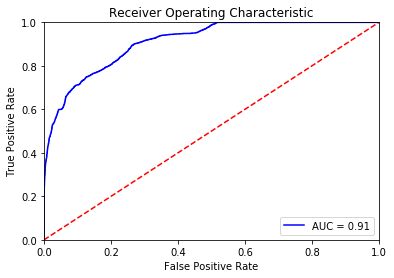

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
from sklearn import metrics
result = y_pred_test_svm * y_test_pred
result
# print(y_pred_test_knn)
# print(y_test_pred)
# print(result)
print("F1:",metrics.f1_score(y_testsvm,result,labels=[0,1,3,5,6,7],average=None))
print("Precision:",metrics.precision_score(y_testsvm,result,labels=[0,1,3,5,6,7],average='weighted'))
print("Recall:",metrics.recall_score(y_testsvm,result,labels=[0,1,3,5,6,7],average='weighted'))

#np.unique(result,return_counts = True)
print('\nDuration in seconds:')
print(elapsed)

F1: [0.91066506 0.7852349  0.03136435 0.         0.44070226 0.08219178]
Precision: 0.7682050338955202
Recall: 0.7878178656813736

Duration in seconds:
75.82409071922302


C:\Users\Boaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# np.unique(y_testsvm, return_counts=True)

In [11]:
data_tuples = list(zip(y_testsvm,result))
df = pd.DataFrame(data_tuples, columns=['y_test','result'])
df[df['y_test']!= 1][df['result']==1]

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,y_test,result
39,7,1
100,5,1
101,7,1
147,0,1
232,0,1
...,...,...
18016,5,1
18169,7,1
18229,7,1
18257,0,1


In [12]:
metrics.multilabel_confusion_matrix(result, y_testsvm, labels =[0,1,3,5,6,7])


array([[[ 2991,  1251],
        [ 1277, 12885]],

       [[17861,     1],
        [  191,   351]],

       [[16521,  1668],
        [  185,    30]],

       [[18356,    48],
        [    0,     0]],

       [[14052,   870],
        [ 2252,  1230]],

       [[18334,    67],
        [    0,     3]]], dtype=int64)

In [13]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_testsvm, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(result, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.80614959, 0.99328927, 0.50329699, 0.5       , 0.72379434,
       0.52142857])

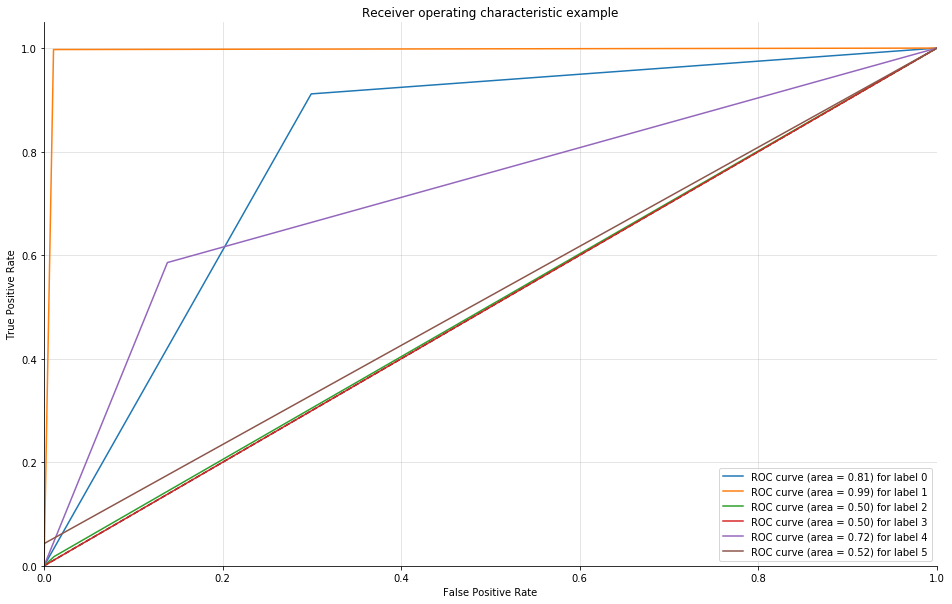

In [14]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(result, y_testsvm, n_classes=6, figsize=(16, 10))

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[12885    62   165     0  1024     0]
 [    0   351     0     0     1     0]
 [  433     8    30     0  1227     0]
 [    0    48     0     0     0     0]
 [  844     6    20     0  1230     0]
 [    0    67     0     0     0     3]]


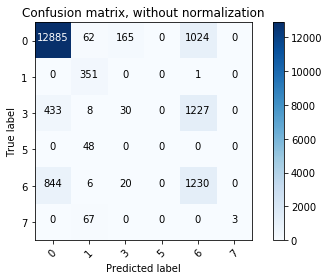

In [16]:
cnf_matrix = metrics.confusion_matrix(y_testsvm, result,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')